<a href="https://colab.research.google.com/github/ngzhiwei517/Machine_Learning_Self-Learn/blob/main/Multivariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariable


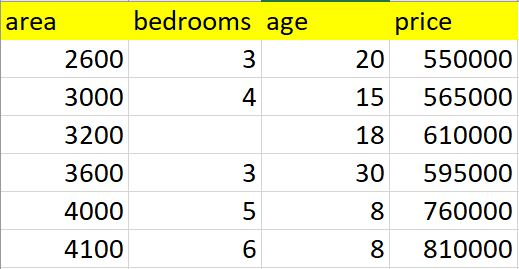

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model


In [2]:
df=pd.read_csv('/content/homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


# Handling missing value


In [ ]:
# we decide to replace it with median value
m=df.bedrooms.median()

In [ ]:
df.bedrooms=df.bedrooms.fillna(m)

In [ ]:
df


,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
reg=linear_model.LinearRegression()
#Train model using training set
reg.fit(df[['area','bedrooms','age']],df['price'])

LinearRegression()

In [ ]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [ ]:
reg.intercept_

np.float64(221323.00186540396)

In [ ]:
reg.predict([[3000,3,40]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [ ]:
112.06244194*3000+23388.88007794*3+(-3231.71790863*40)+221323.00186540396

498408.251574024



---

# Exercise
In exercise folder (same level as this notebook on github) there is hiring.csv. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,

2 yr experience, 9 test score, 6 interview score

12 yr experience, 10 test score, 10 interview score

In [ ]:
a_df=pd.read_csv('/content/hiring.csv')
a_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
a_df.experience=a_df.experience.fillna('zero')
a_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
import math
median_test_score = math.floor(a_df['test_score(out of 10)'].mean())
median_test_score

7

In [ ]:
a_df['test_score(out of 10)']=a_df['test_score(out of 10)'].fillna(median_test_score)

In [ ]:
a_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [ ]:
pip install word2number


In [ ]:
from word2number import w2n
a_df.experience = a_df.experience.apply(w2n.word_to_num)
a_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [ ]:
reg=linear_model.LinearRegression()
reg.fit(a_df[['experience','test_score(out of 10)','interview_score(out of 10)']],a_df['salary($)'])

LinearRegression()

In [ ]:
reg.predict([[2,9,6]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [ ]:
reg.predict([[12,10,10]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93747.79628651])



---



---



---



# Exercise

Car price prediction with missing data. Features: Year [2015, 2016, 2017, 2018, 2019], Mileage [50000, 40000, NaN, 20000, 15000], Condition (1-10) [7, 8, 8, 9, NaN], Price [15000, 18000, 20000, 24000, 27000]. Fill missing values with median, then predict price for: 2017, 30000 miles, condition 8.

In [28]:
import pandas as pd
import numpy as np
from sklearn import linear_model

df = pd.DataFrame({
    'year': [2015, 2016, 2017, 2018, 2019],
    'mileage': [50000, 40000, np.nan, 20000, 15000],
    'condition': [7, 8, 8, 9, np.nan],
    'price': [15000, 18000, 20000, 24000, 27000]
})
df

,year,mileage,condition,price
0,2015,50000.0,7.0,15000
1,2016,40000.0,8.0,18000
2,2017,NaN,8.0,20000
3,2018,20000.0,9.0,24000
4,2019,15000.0,NaN,27000


In [30]:
median_mileage=df.mileage.median()
median_condition=df.condition.median()
df['mileage']=df['mileage'].fillna(median_mileage)
df['condition']=df['condition'].fillna(median_condition)
df

,year,mileage,condition,price
0,2015,50000.0,7.0,15000
1,2016,40000.0,8.0,18000
2,2017,30000.0,8.0,20000
3,2018,20000.0,9.0,24000
4,2019,15000.0,8.0,27000


In [32]:
median_condition,median_mileage

(8.0, 30000.0)

In [34]:
reg=linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

LinearRegression()

In [36]:
reg.predict([[2017,30000,8]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([20249.99999999])



---

Employee salary prediction based on experience, education level, and hours/week. Data: Experience [1, 3, 5, 7, 10], Education (years) [12, 14, 16, 16, 18], Hours/week [40, 45, 50, 50, 55], Salary [30000, 40000, 55000, 65000, 80000]. Predict for: 6 years exp, 16 years education, 48 hours/week.

In [37]:
import pandas as pd
from sklearn import linear_model

df = pd.DataFrame({
    'experience': [1, 3, 5, 7, 10],
    'education': [12, 14, 16, 16, 18],
    'hours_per_week': [40, 45, 50, 50, 55],
    'salary': [30000, 40000, 55000, 65000, 80000]
})
df

,experience,education,hours_per_week,salary
0,1,12,40,30000
1,3,14,45,40000
2,5,16,50,55000
3,7,16,50,65000
4,10,18,55,80000


In [38]:
reg=linear_model.LinearRegression()
reg.fit(df.drop('salary',axis='columns'),df.salary)

LinearRegression()

In [44]:
m=reg.coef_
c=reg.intercept_
m
print(f'Equation: Salary={m[0]:.2f}*experience+{m[1]:.2f}*education+{m[2]:.2f}*hours_per_week+{c:.2f}')

Equation: Salary=4819.28*experience+182.80*education+457.00*hours_per_week+4225.18


In [45]:
m

array([4819.27710843,  182.80016618,  457.00041545])

In [47]:
c

np.float64(4225.1765683423)

In [46]:
reg.predict([[6,16,48]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([58001.66181969])

In [48]:
4819.27710843*6+182.80016618*16+ 457.00041545*48+4225.1765683423

58001.6618194023